# Seeded Poisson Factorization (SPF) example notebook

This notebook is a minimal example of the SPF model.

In [9]:
# Imports
from SPF.SPF_model import SPF
import numpy as np
import pandas as pd

df1 = pd.read_csv("./data/10k_amazon.csv")
df1.head()

,Unnamed: 0,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,tokens
0,15123,B00032G1S0,"Tuscan Whole Milk, 1 Gallon, 128 fl oz",A3B4TGHT06VIV9,19/20,5.0,1220659200,"It is a Tuscan Milkman,And he stoppeth only me...",grocery gourmet food,dairy eggs,milk,106
1,29859,B000O1LEK0,Kid Galaxy Mega X Morphibian Komodo dragon,A29BL1ME0A4S0U,1/1,4.0,1306800000,This is a fun car. The only problem is the sho...,toys games,electronics for kids,unknown,52
2,25129,B000G7WU50,Boon Flo Water Deflector and Protective Faucet...,A1M2CJJ859SZV7,1/1,2.0,1285372800,This does indeed deflect the water for a softe...,baby products,safety,bathroom safety,284
3,20101,B000K50KVO,Playtex Baby Einstein 6oz. Spill-Proof Trainer...,A1YU39HHJTF0F0,0/0,1.0,1254700800,because my little girl loves to chew on her si...,baby products,feeding,solid feeding,46
4,18841,B0001E8BJ2,Pre~Seed Intimate Moisturizer with 2 Early Pre...,A17YQZH6BBY9O4,2/2,5.0,1244851200,We got pregnant after using this product only ...,health personal care,health care,family planning contraceptives,49


In [10]:
# Define keywords
pets = ["dog", "cat", "cats", "dogs", "box", "food", "toy", "pet"]
toys = ["toy", "game", "play", "fun", "son", "daughter", "kids", "playing", "christmas", "toys", "child", "gift"]
beauty = ["skin", "color", "scent", "smell", "dry", "face", "look", "fragrance", "products", "dry", "perfume", "shampoo"]
baby = ["baby", "seat", "son", "daughter", "newborn", "months", "diaper", "diapers", "car", "stroller", "pump", "bag", "child"]
health = ["try", "long", "water", "feel", "shave", "razor", "shaver", "pain", "heart", "tooth", "balm", "pads", "taste", "drink","medical", "blade", "oil", "plastic", "shaker", "soap"]
grocery = ["tea", "taste", "flavor", "coffee", "chocolate", "sugar", "milk", "delicious", "water", "diet"]

keywords = {"pet supplies": pets, "toys games": toys, "beauty": beauty, "baby products": baby, "health personal care": health, "grocery gourmet food": grocery}

## SPF model

In [11]:
# Initialize the model
spf1 = SPF(keywords = keywords, residual_topics=0)
spf1

Seeded Poisson Factorization (SPF) model initialized with 6 keyword topics and 0 residual topics.

In [12]:
# Read documents and create the data required in the backend
spf1.read_docs(df1["Text"])

In [13]:
# Train the model
spf1.model_train(lr = 0.1, epochs = 150, tensorboard = False)

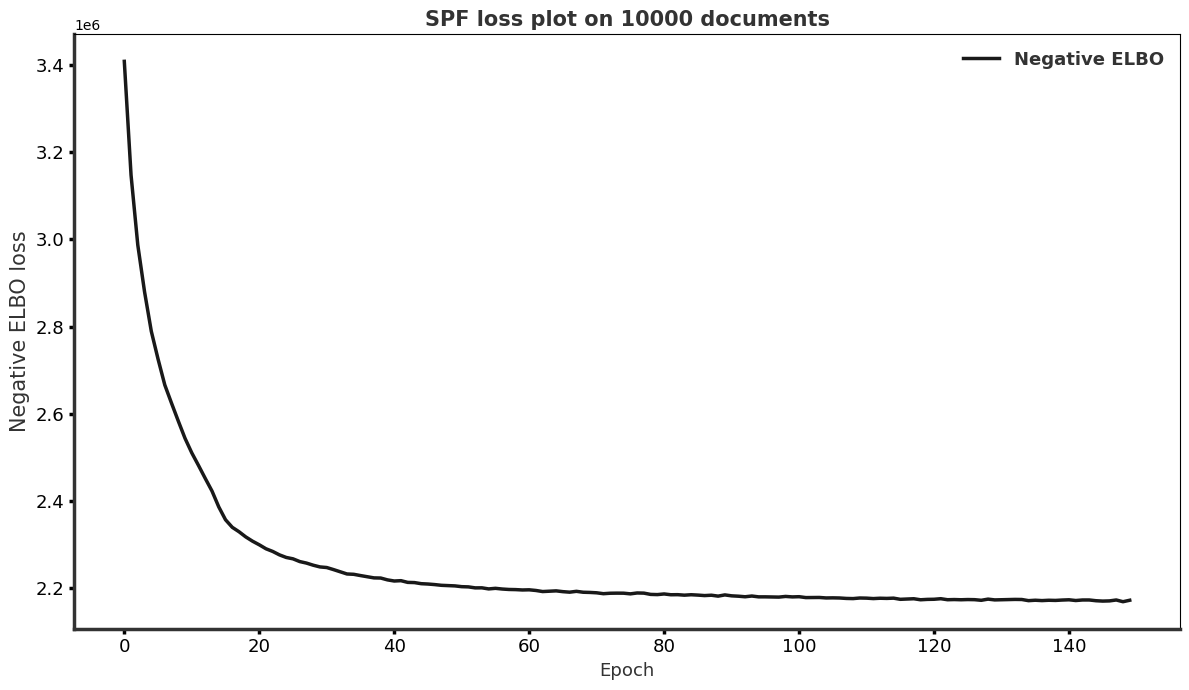

In [14]:
# See model results
spf1.plot_model_loss(neg_elbo = True)

In [15]:
betas = spf1.calculate_topic_word_distributions()
betas

,pet supplies,toys games,beauty,baby products,health personal care,grocery gourmet food
00,1.426080,0.030959,0.020813,0.016533,0.118910,0.245070
000,0.123044,0.051360,0.018634,0.041235,0.104193,0.182013
02,0.005733,0.012380,0.011661,0.055244,0.012080,0.013354
03,0.051651,0.008500,0.013956,0.005951,0.010076,0.006964
04,0.011802,0.006546,0.027504,0.063903,0.021566,0.008372
...,...,...,...,...,...,...
zoo,0.007905,0.022905,0.004967,0.068806,0.010427,0.008950
zoom,0.010607,0.062921,0.012984,0.008872,0.010114,0.012472
zords,0.007153,0.033528,0.006246,0.009858,0.009237,0.010518
zucchini,0.011973,0.006455,0.009886,0.008892,0.007405,0.046529


In [16]:
# Calculate model accuracy
categories, E_theta = spf1.calculate_topics()
df1["SPF_estimates"] = categories
df1["Accuracy"] = df1.Cat1 == df1.SPF_estimates

from sklearn.metrics import classification_report, confusion_matrix
import pprint
pprint.pprint(classification_report(df1.Cat1, df1.SPF_estimates))


('                      precision    recall  f1-score   support\n'
 '\n'
 '       baby products       0.71      0.79      0.75      1501\n'
 '              beauty       0.70      0.79      0.74      1374\n'
 'grocery gourmet food       0.61      0.89      0.72       855\n'
 'health personal care       0.78      0.48      0.59      2314\n'
 '        pet supplies       0.57      0.76      0.65      1253\n'
 '          toys games       0.92      0.81      0.86      2703\n'
 '\n'
 '            accuracy                           0.73     10000\n'
 '           macro avg       0.71      0.75      0.72     10000\n'
 '        weighted avg       0.75      0.73      0.73     10000\n')
